# 04 - Infonuagique 1 - Atelier #2

### Importation des bibliothèques

In [25]:
import io
import os
from google.cloud import vision

from utils2 import display_faces_results, display_image

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Affichage de l'image

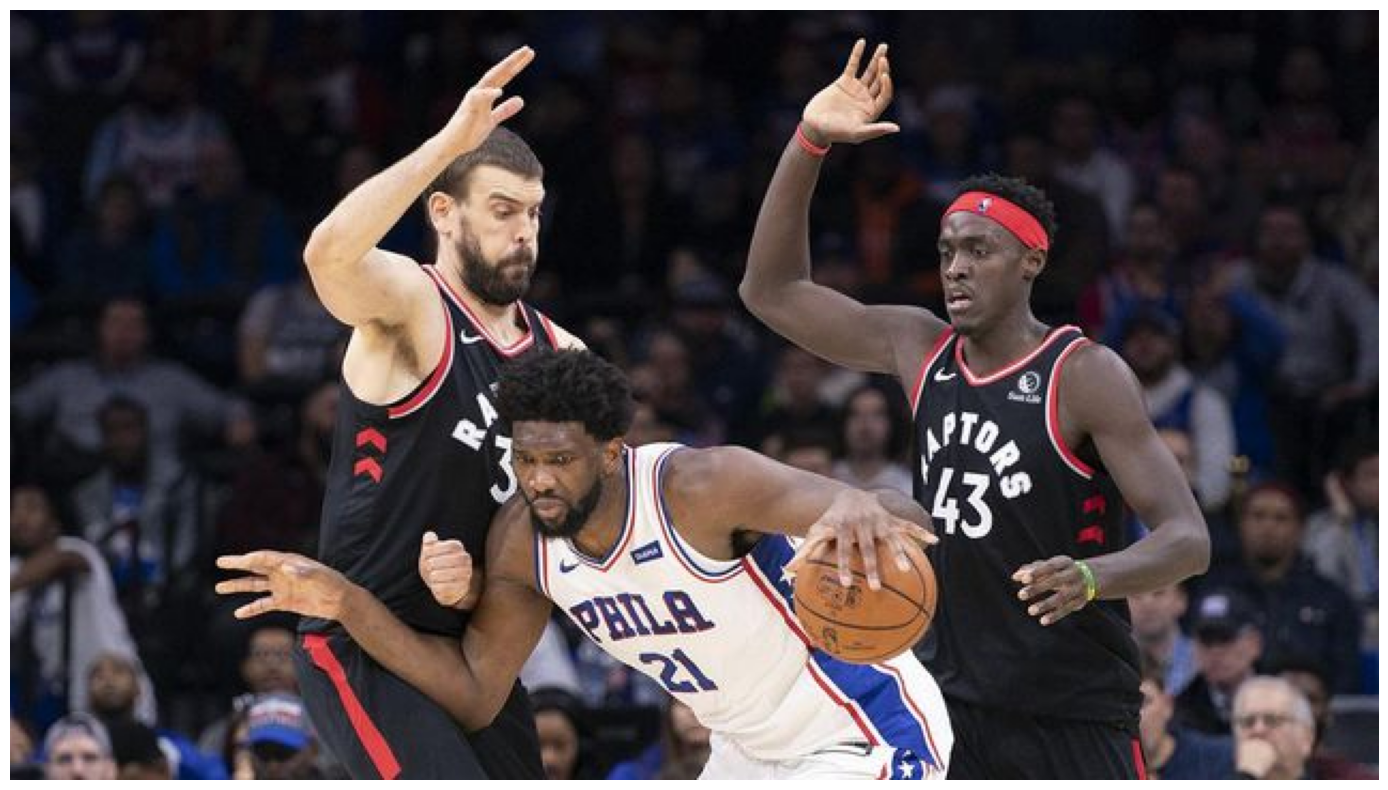

In [33]:
_ = display_image('raptors.jpg')

### Instanciation du client

In [28]:
client = vision.ImageAnnotatorClient()

### Chargement de l'image

In [29]:
file_name = os.path.abspath('wakeupcat.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

### Détection des "étiquette" présentes dans l'image

In [30]:
response = client.face_detection(image=image)
faces = response.face_annotations

### Détection d'objets

In [31]:
# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
print('Faces:')
for face in faces:
        print(f'anger: {likelihood_name[face.anger_likelihood]}')
        print(f'joy: {likelihood_name[face.joy_likelihood]}')
        print(f'surprise: {likelihood_name[face.surprise_likelihood]}')

        vertices = ([f'({vertex.x},{vertex.y})'
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

result = {}
for i, face_ in enumerate(faces):
        vertices = []
        for vertex in face_.bounding_poly.vertices:
            vertices.append((vertex.x, vertex.y))
        result[i] = {
          'anger': likelihood_name[face_.anger_likelihood],
          'joy': likelihood_name[face_.joy_likelihood],
          'surprise': likelihood_name[face_.surprise_likelihood],
          'vertices': vertices
        }


Faces:


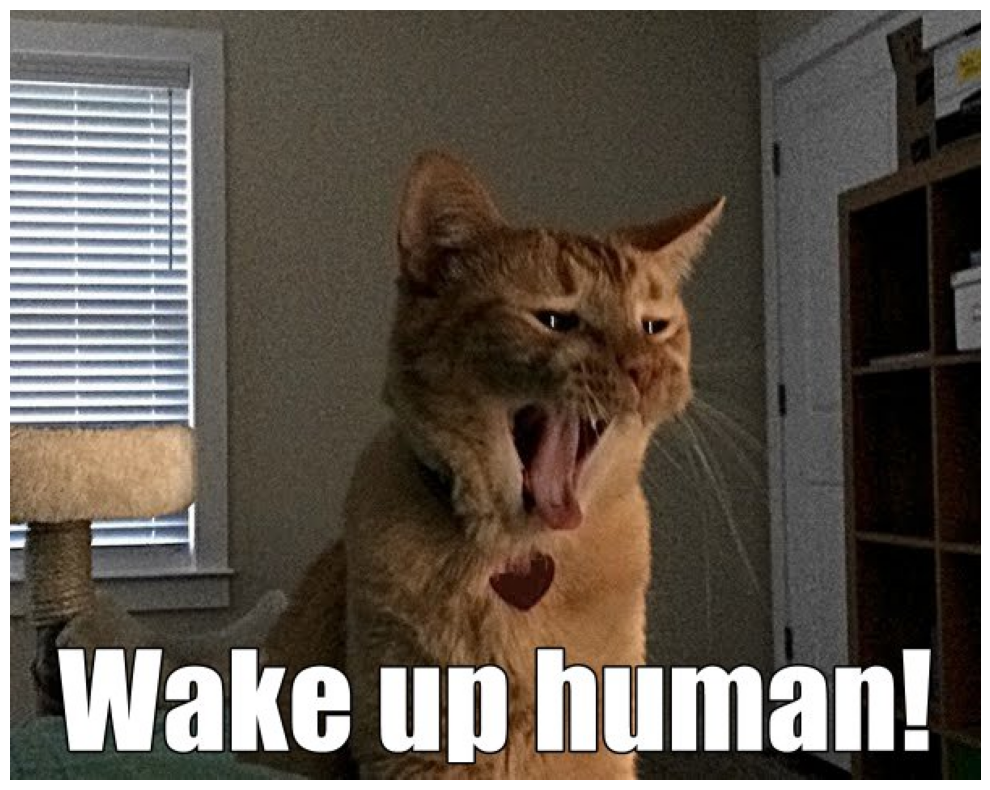

In [32]:
display_faces_results('wakeupcat.jpg', result)